# Building the Connectome

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Path for the files of the Connectome
path = 'Matrixes/'

In [3]:
#998x998   %Average length of each link
CIJ_edgelength_average = pd.read_csv(path+'CIJ_edgelength_average.csv',header=None)

In [4]:
#998x998   %this corresponds to the link' strengths
CIJ_fbden_average = pd.read_csv(path+'CIJ_fbden_average.csv',header=None)

In [5]:
#998x998   %is a resampling of the CIJ_fbden_average one by Olaf
CIJ_resampled_average = pd.read_csv(path+'CIJ_resampled_average.csv',header=None)

In [6]:
#998x998   %the average FUNCTIONAL correlation
COR_fMRI_average = pd.read_csv(path+'COR_fMRI_average.csv',header=None)

In [7]:
#1x998       % the "names" in integer of each node
roi_lbls = np.genfromtxt(path+'roi_lbls.csv',delimiter=',', dtype=int)

In [8]:
#3x998       %xyz position of each node
roi_xyz_avg = pd.read_csv(path+'roi_xyz_avg.csv',header=None)

In [9]:
#998x3 %       %the Talairich coordinates of each node, e.g.,, to plot the i node you may do:
#%                                          %xyz=talairach(i,:);
#%                                          %plot3(xyz(1),xyz(2),xyz(3),'x')
talairach = pd.read_csv(path+'talairach.csv',header=None)

In [10]:
#66x1 %labels of the 66 Regions of Interest (ROI)
anat_lbls = np.loadtxt(path+'anat_lbls.txt', dtype=np.str)

In [11]:
#1x998 List of labels of all nodes with one of the ROIs
lbls = []
for idx, lbl in enumerate(roi_lbls):
    lbls.append(anat_lbls[lbl-1])

In [12]:
#Builind a networkx Graph with a adjacency matrix
adj=np.matrix(CIJ_fbden_average)
G=nx.from_numpy_matrix(adj)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


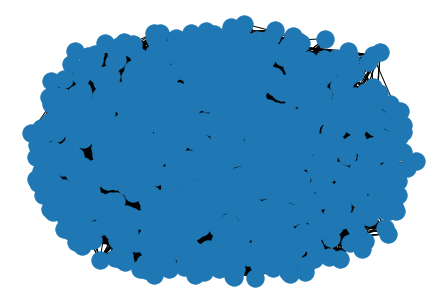

In [13]:
pos = nx.spring_layout(G, k=3/np.sqrt(len(G.nodes())), iterations=20)
nx.draw(G,pos=pos)